# Salary Predictions Based on Job Descriptions

### Author: Sophia Bouchama

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The aim of this project is to predict the salary of new job postings based on previous job posting data. The job posting data consists of the following features:

In [4]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline 
#etc

__author__ = "Sophia Bouchama"
__email__ = "hello@sophiabouchama.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [5]:
#load the training data into a Pandas dataframe
df_features = pd.read_csv('data/train_features.csv')
df_salaries = pd.read_csv('data/train_salaries.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_features.csv'

In [4]:
df_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
df_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
print('df_features size:', df_features.shape)
print('df_features size:', df_salaries.shape)

df_features size: (1000000, 8)
df_features size: (1000000, 2)


### ---- 3 Clean the data ----

In [7]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [8]:
# Check if there are any duplicate Job IDs in the dataframes
df_features['jobId'].nunique()

1000000

In [9]:
df_salaries['jobId'].nunique()

1000000

Job ID is unique in the dataset. Since there are no duplicates, there should be a 1-1 mapping between the two dataframes based on JobID, making it possible to merge and create one dataframe

In [10]:
# Merge the dataframes to create 1 dataframe
df = pd.merge(df_features, df_salaries, on='jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [11]:
# Check the shape to make sure it is the size we expected and no data was lost
df.shape

(1000000, 9)

In [12]:
# Check if there is any missing values in our dataset
df.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

There is no missing data in the dataset

In [13]:
# Check the type of our features to examine if there are any data inconsistencies
df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

All data types seem consistent

In [14]:
# We can now drop the 'Jobid' columns since ID is only used for unique job identification and provides us with no useful insights or meaningful information.
# df.drop(['jobId'], axis=1, inplace=True)
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [15]:
# Check number of unique values in the dataset
df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [16]:
# Check to see if there is any categorical values in our data set that are unmeaningful or corrupt
# Checking unique values and their value counts
columns = df[['jobType', 'degree', 'major', 'industry']]
for column in columns:    
    print(column,':\n', df[column].value_counts(),'\n')
    
    

jobType :
 SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64 

degree :
 HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64 

major :
 NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64 

industry :
 WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64 



All values of the features make logical sense

In [17]:
# Display the statistical overview of the numerical data
# Check minimum and maximum value for each column 
# Check for outliers or corrupt data
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


We can spot some corrupt salary data. The maximum value of 301k USD doesn't seem unusual, however it doesn't make sense to have a salary of 0. Therefore this unusually small minimum value should be be investigated further. 

The values of the other columns, 'yearsExperience' and 'milesfromMetropolis' seem to make logical sense.

**where is median**Our features do not appear to be skewed since mean and median are similar, this suggests to be us that based on the distribution, we do not need to transform our data.


In [18]:
len(df.loc[df['salary'] == 0])

5

As we can see, there are 5 values with a salary of 0.
I decided to investigate further to see if there are any other extreme values in our dataset. 

According to the Salary Explorer website (salaryexplorer.com/Salaries): 
The range of salaries in the US are 24k USD (lowest average) to 423k USD (highest average, actual maximum salary is higher).

This tells us that our maximum value of 301k USD is within reason. However I decided to see if there are any extreme lower values below the minimum average of 24k USD.

In [ ]:
plt.figure()
plt.scatter(df['jobId'], [df['salary'] <= 24])

We can see that there are only 5 rows with salary value of 0. Removing these rows will have a small effect on the dataset since 5 rows is very small compared to the total number of the dataset.

Since salary is our target feature, it doesn't make sense to impute these values as it would be biasing our dataset. Since we cannot make use of the information for these rows with a salary of '0', they will be dropped/disregarded.

In [ ]:
df.drop(df[df.salary == 0].index, inplace=True)
df.shape

In [ ]:
df['salary'].describe()

We can see that the salary values make more logical sense now

In our dataframe we can see that we have now have 7 features in total.

Categorical features:
- jobType 
- degree
- major
- industry
- companyId

Numerical features:
- yearsExperience
- milesFromMetropolis
- salary

### ---- 4 Explore the data (EDA) ----

In [ ]:
#summarize each feature variable
#summarize the target variable
#Relationship analysis:
    #look for correlation between each feature and the target
    #look for correlation between features

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 8 columns):
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(5)
memory usage: 68.7+ MB


In [ ]:
# Visualise the relationship between pairs of variables in the dataset using pair scatter plots
sns.distplot(df)



There seems to be weak linear relationships between the numerical variables. The data points are very scattered, showing lots of variability. Therefore these numerical variables do not seem to be a reliable in finding relationships.

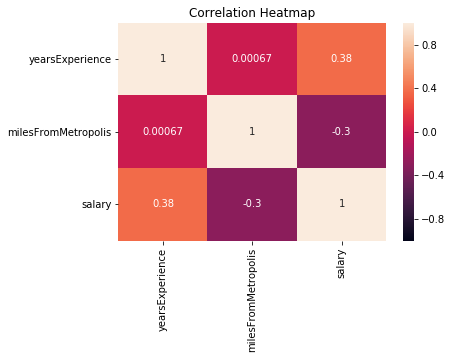

In [29]:
# Create the correlation matrix heatmap. What features correlate the most with salary? What other correlations did you find?
correlation = df.corr()
cor_heatmap = sns.heatmap(correlation, xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=1, annot=True)
# Set the title
cor_heatmap.set_title('Correlation Heatmap');

We can see that there is **some** positive correlation between yearsExperience and salary and **some** negative correlation between milesFromMetropolis and salary.

However, there no particularly strong correlations. Therefore we cannot rely on this alone to give us any conclusions about the data.

In [30]:
# We can calculate the P values to see if there is any significance in the corrlation coefficients between the variables.
print(stats.pearsonr(df['salary'], df['milesFromMetropolis']))
print(stats.pearsonr(df['salary'], df['yearsExperience']))
print(stats.pearsonr(df['milesFromMetropolis'], df['yearsExperience']))

(-0.2976864270496445, 0.0)
(0.37501340199971983, 0.0)
(0.0006718752899659805, 0.5016646481656769)


The P Values indicate that there is no evidence to suggest the significance of the correlations

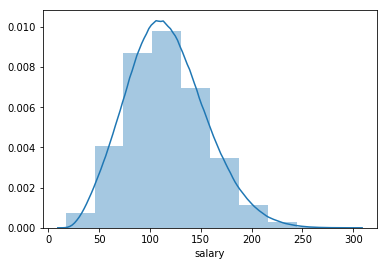

In [31]:
# We can see that salary has a normal shaped distribution
# Let's take a closer look
sns.distplot(df['salary'], bins=10)

In [ ]:
# Plot some bar graphs to see how categorical variables affect average salary
f, axes = plt.subplots(ncols=4, figsize=(20, 5))

jobType_summary_mean['salary'].plot.bar(ax=axes[0])
axes[0].set_ylabel('Salary')

major_summary.mean()['salary'].plot.bar(ax=axes[1])
axes[1].set_ylabel('Salary')

degree_summary_mean['salary'].plot.bar(ax=axes[2])
axes[2].set_ylabel('Salary')

industry_summary_mean['salary'].plot.bar(ax=axes[3])
axes[3].set_ylabel('Salary')

In [ ]:
# Plot some bar graphs to see how categorical variables affect average salary
plt.figure(figsize=(20, 10))
b = sns.boxplot(x="jobType", y="salary", data=df)
b.axes.set_title("Box Plot: Job Type and Salary",fontsize=20)
b.set_xlabel("Job Type",fontsize=15)
b.set_ylabel("Salary",fontsize=15)

In [ ]:
# Plot some bar graphs to see how categorical variables affect average salary
plt.figure(figsize=(20, 10))
b = sns.boxplot(x="major", y="salary", data=df)
b.axes.set_title("Box Plot: Major and Salary",fontsize=20)
b.set_xlabel("Major",fontsize=15)
b.set_ylabel("Salary",fontsize=15)

In [ ]:
# Plot some bar graphs to see how categorical variables affect average salary
plt.figure(figsize=(20, 10))
b = sns.boxplot(x="degree", y="salary", data=df)
b.axes.set_title("Box Plot: Degree and Salary",fontsize=20)
b.set_xlabel("Degree",fontsize=15)
b.set_ylabel("Salary",fontsize=15)

In [ ]:
# Plot some bar graphs to see how categorical variables affect average salary
plt.figure(figsize=(20, 10))
b = sns.boxplot(x="industry", y="salary", data=df)
b.axes.set_title("Box Plot: Industry and Salary",fontsize=20)
b.set_xlabel("Industry",fontsize=15)
b.set_ylabel("Salary",fontsize=15)

When grouping each categorical variable by salary. We can see the following relationships:

1) Job Type:
- CEO/CTO havw higher average salaries
- Janitor has the lowest average salary
- This is as expected since job type is an ordinal categorial variable
    
2) Major:
- Some salary variation
- No major clearly has the lowest average salary 
- Engineering seems to have the highest average salary, but not conclusive enough

3) Degree:
- No degree has the lowest average salary
- Doctoral degree has the highest average salary
- This is as expected since degree is an ordinal categorial variable
    
4) Industry:
- Some salary variation
- Finance and oil seem to have the highest average salaries
- Education seems to have the lowest average salary


### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [507]:
# For the baseline model, I perform a simple linear regression model
# Multiple Linear Regression — Baseline for the model
# regression is the process of predicting a continuous value.
# Salary is our dependent varible
# .... are our independent variables 
'''
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
X = df[['yearsExperience']]
Y = df['salary']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]  

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="yearsExperience", y="salary", data=df)
plt.ylim(0,)'''

pd.get_dummies(df)

,yearsExperience,milesFromMetropolis,salary,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,130,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,101,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,137,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,8,17,142,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,2,31,113,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,23,24,178,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,9,70,73,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1,54,31,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,17,68,104,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data